# Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

# 
Prepare a model for glass classification using Random Forest
Data Description:
RI : refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
AI: Aluminum
Si: Silicon
K:Potassium
Ca: Calcium
Ba: Barium
Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

# 1. Exploratory Data Analysis (EDA):

In [1]:
#importing pandas for reading the file

import pandas as pd
import numpy as np


In [2]:
#reading the file

df=pd.read_excel("glass.xlsx",sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#checking the shape of data

df.shape

(214, 10)

In [4]:
#checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#checking the descriptive analysis of data

df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
#from the above observation we can conclude that all the variables are in countinous datatype and the data consist of 214 
#values.we can see there are no null values preseny in the data do no need of data imputation


In [7]:
#checking for the null values

df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.

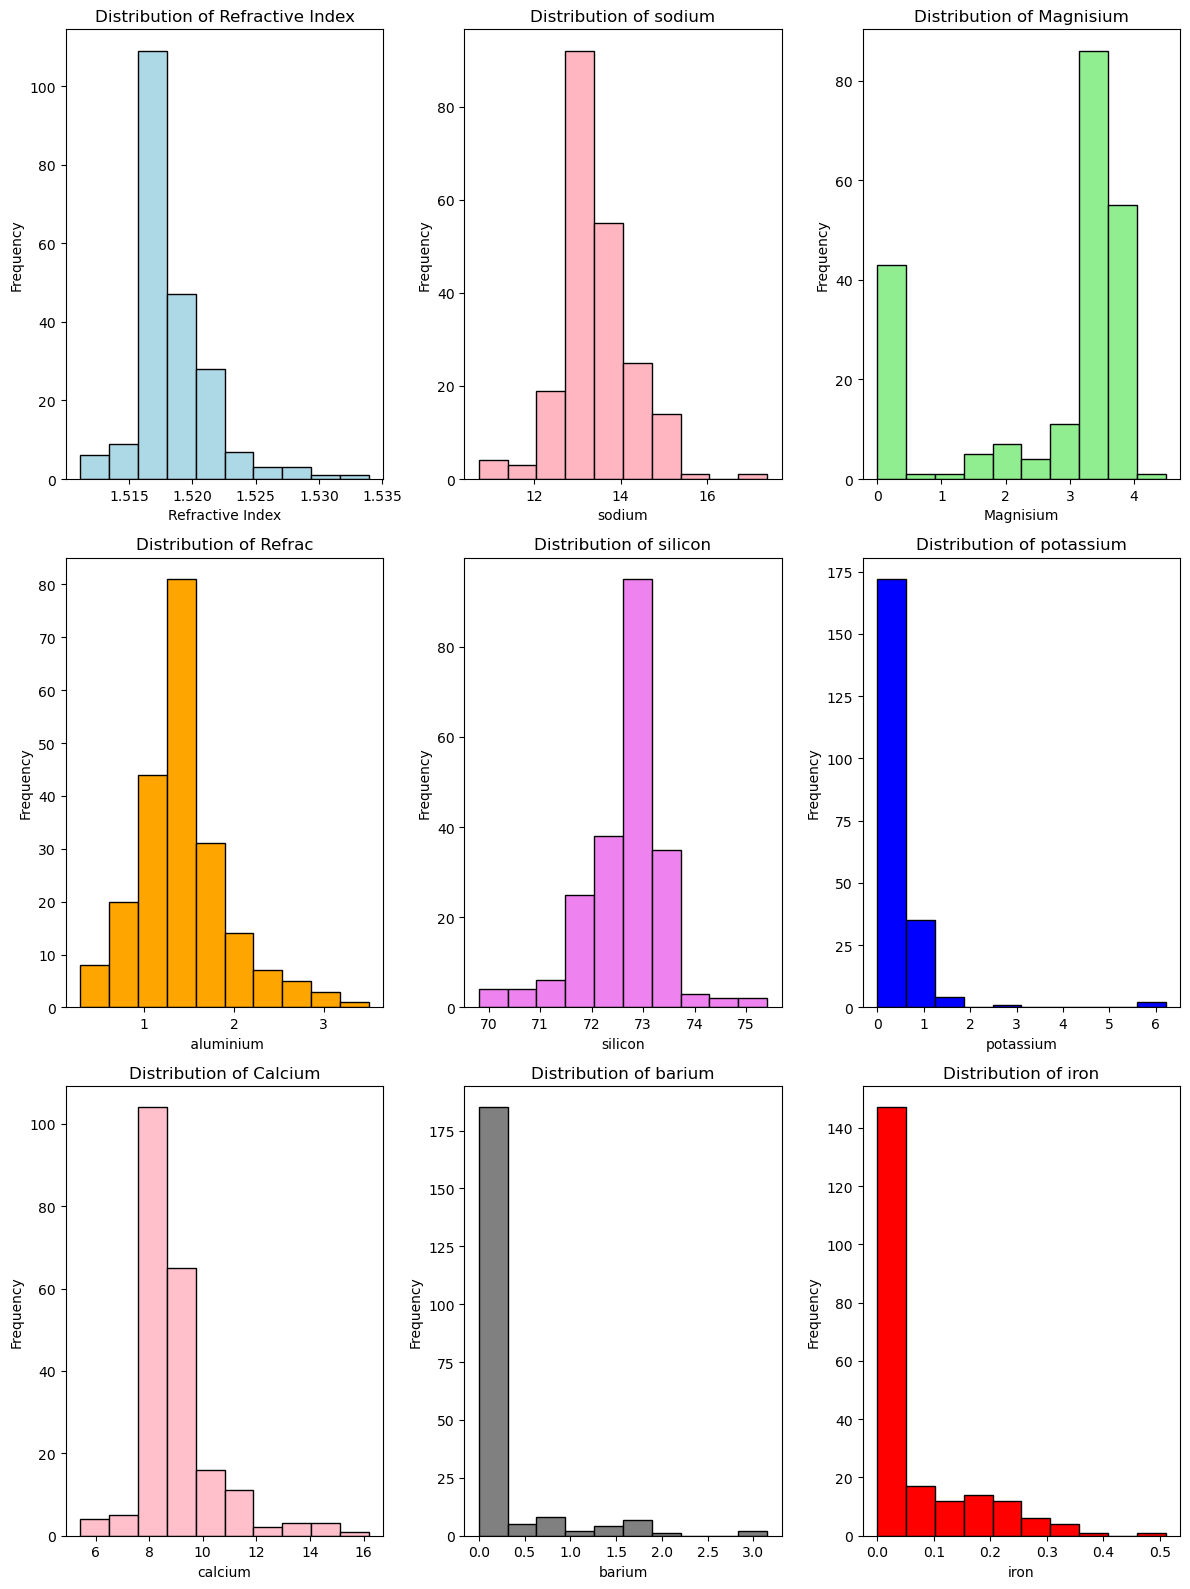

In [8]:
#creating a dashboard for visualizing the data with the help of histogram 

import matplotlib.pyplot as plt 

fig,axes=plt.subplots(3,3,figsize=(12,16))

axes[0,0].hist(df['RI'],color='lightblue',edgecolor='black')
axes[0,0].set_title("Distribution of Refractive Index")
axes[0,0].set_xlabel("Refractive Index")
axes[0,0].set_ylabel("Frequency")

axes[0,1].hist(df['Na'],color='lightpink',edgecolor='black')
axes[0,1].set_title("Distribution of sodium")
axes[0,1].set_xlabel("sodium")
axes[0,1].set_ylabel("Frequency")

axes[0,2].hist(df['Mg'],color='lightgreen',edgecolor='black')
axes[0,2].set_title("Distribution of Magnisium")
axes[0,2].set_xlabel("Magnisium")
axes[0,2].set_ylabel("Frequency")

axes[1,0].hist(df['Al'],color='orange',edgecolor='black')
axes[1,0].set_title("Distribution of Refrac")
axes[1,0].set_xlabel(" aluminium")
axes[1,0].set_ylabel("Frequency")

axes[1,1].hist(df['Si'],color='violet',edgecolor='black')
axes[1,1].set_title("Distribution of silicon")
axes[1,1].set_xlabel("silicon")
axes[1,1].set_ylabel("Frequency")

axes[1,2].hist(df['K'],color='blue',edgecolor='black')
axes[1,2].set_title("Distribution of potassium")
axes[1,2].set_xlabel("potassium")
axes[1,2].set_ylabel("Frequency")

axes[2,0].hist(df['Ca'],color='pink',edgecolor='black')
axes[2,0].set_title("Distribution of Calcium")
axes[2,0].set_xlabel("calcium")
axes[2,0].set_ylabel("Frequency")

axes[2,1].hist(df['Ba'],color='grey',edgecolor='black')
axes[2,1].set_title("Distribution of barium")
axes[2,1].set_xlabel("barium")
axes[2,1].set_ylabel("Frequency")


axes[2,2].hist(df['Fe'],color='red',edgecolor='black')
axes[2,2].set_title("Distribution of iron")
axes[2,2].set_xlabel("iron")
axes[2,2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [9]:

b=list(df)
for i in b:
    c=df[i].skew()
    
    if c>0:
        print(f"skewness of {i}  : {c}   is right skewed")
        print()
    elif c<0:
        print(f"skewness of {i}  : {c}   is left skewed")
        print()
    else:
        print(f"skewness of {i}  : {c}   is symmetric zero skewed")
        print()

skewness of RI  : 1.6254305060087644   is right skewed

skewness of Na  : 0.4541814536577495   is right skewed

skewness of Mg  : -1.1525593175802356   is left skewed

skewness of Al  : 0.9072898090246346   is right skewed

skewness of Si  : -0.7304472251318588   is left skewed

skewness of K  : 6.55164830960496   is right skewed

skewness of Ca  : 2.0470539131183103   is right skewed

skewness of Ba  : 3.4164245693025577   is right skewed

skewness of Fe  : 1.754327470435831   is right skewed

skewness of Type  : 1.114915200905486   is right skewed



In [10]:
#from the above information we can say that most of the data is rightskewed mean most of the data in column is distributed 
#towards left there is no such columns that is distributed normally


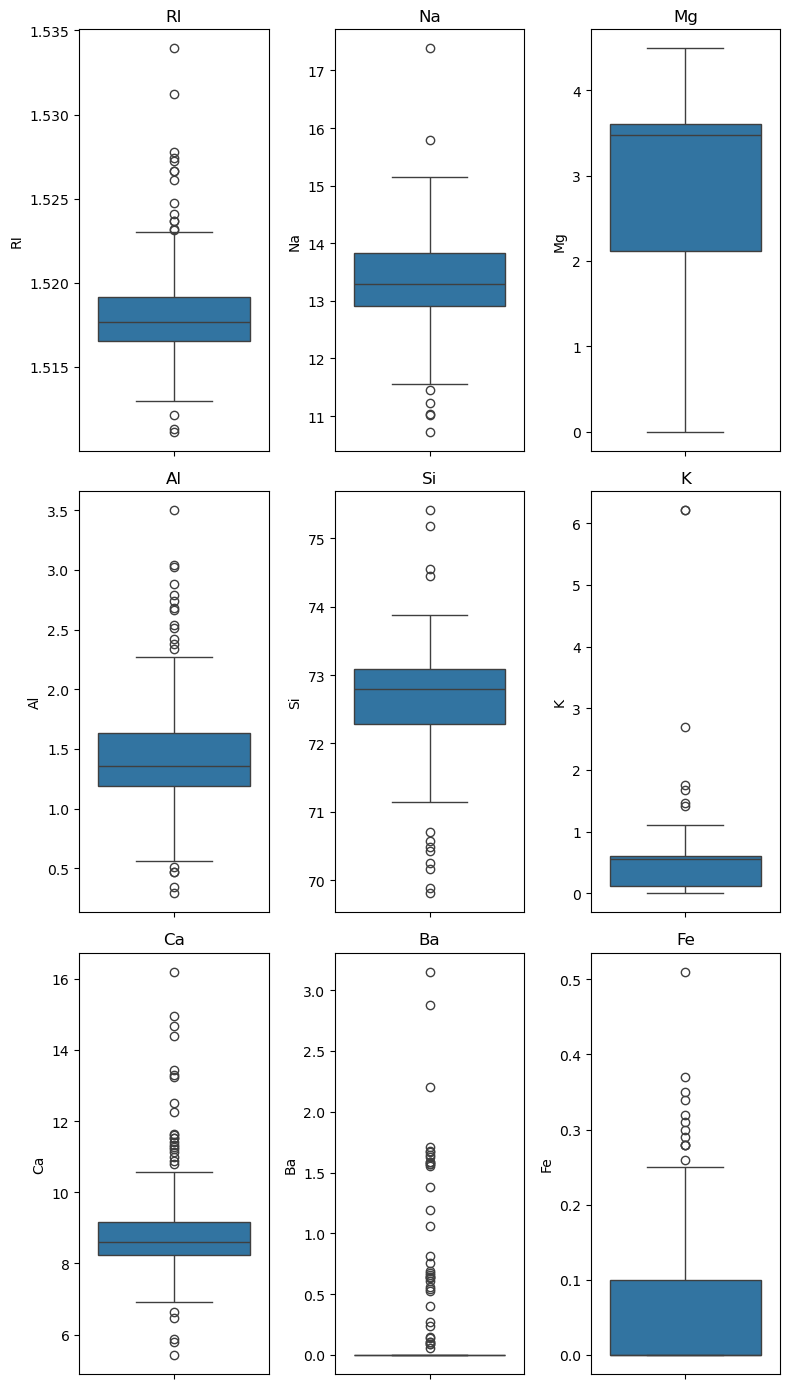

In [11]:
#creating the boxplots for checking for oulayers

import seaborn as sns

columns=list(df.iloc[:,:9])

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(8,14))

#flatten for easily matching the index

axes=axes.flatten()

for i,columns in enumerate(columns):
    sns.boxplot(data=df[columns],ax=axes[i])
    axes[i].set_title(columns)


plt.tight_layout()
plt.show()

<AxesSubplot:>

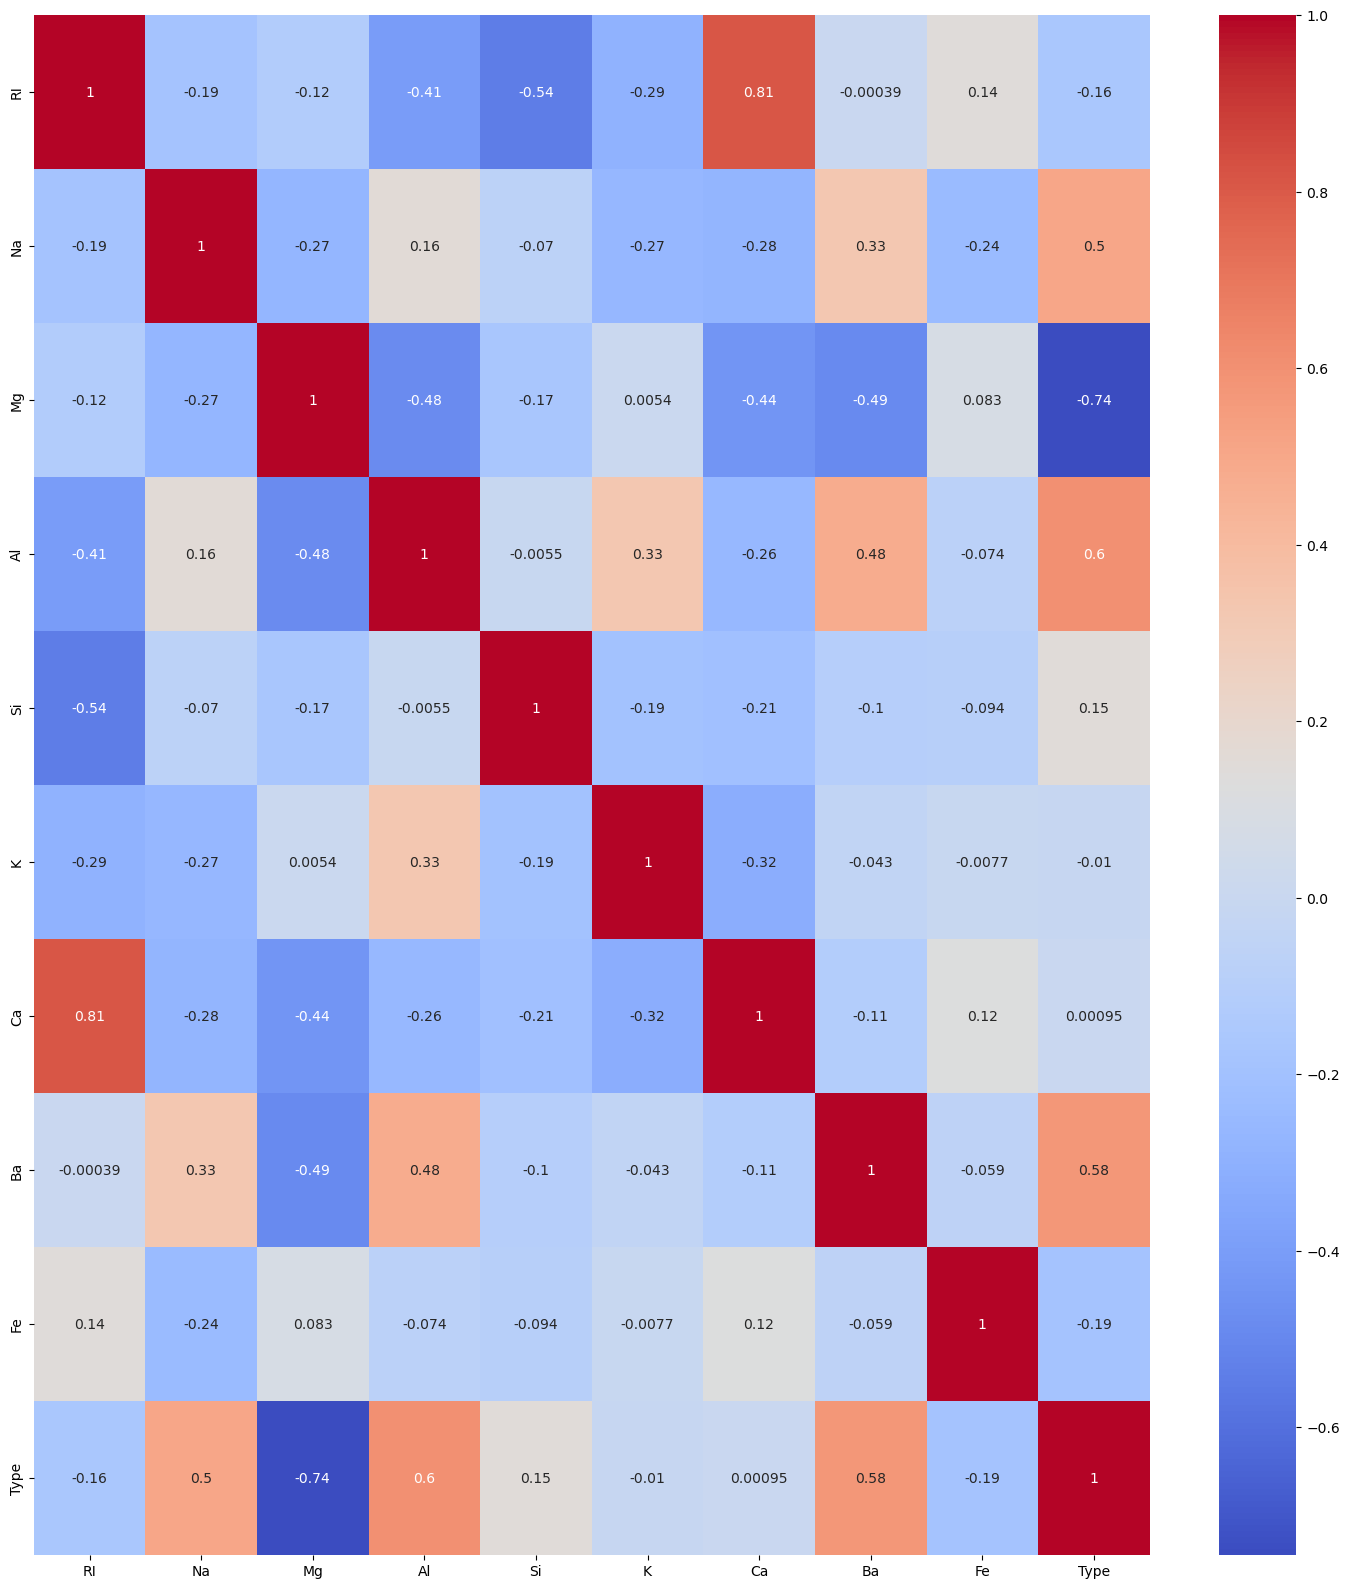

In [12]:
#creating a colleration heatmap

plt.figure(figsize=(18,20))
correlation=df.corr()


sns.heatmap(correlation,cmap="coolwarm",annot=True)

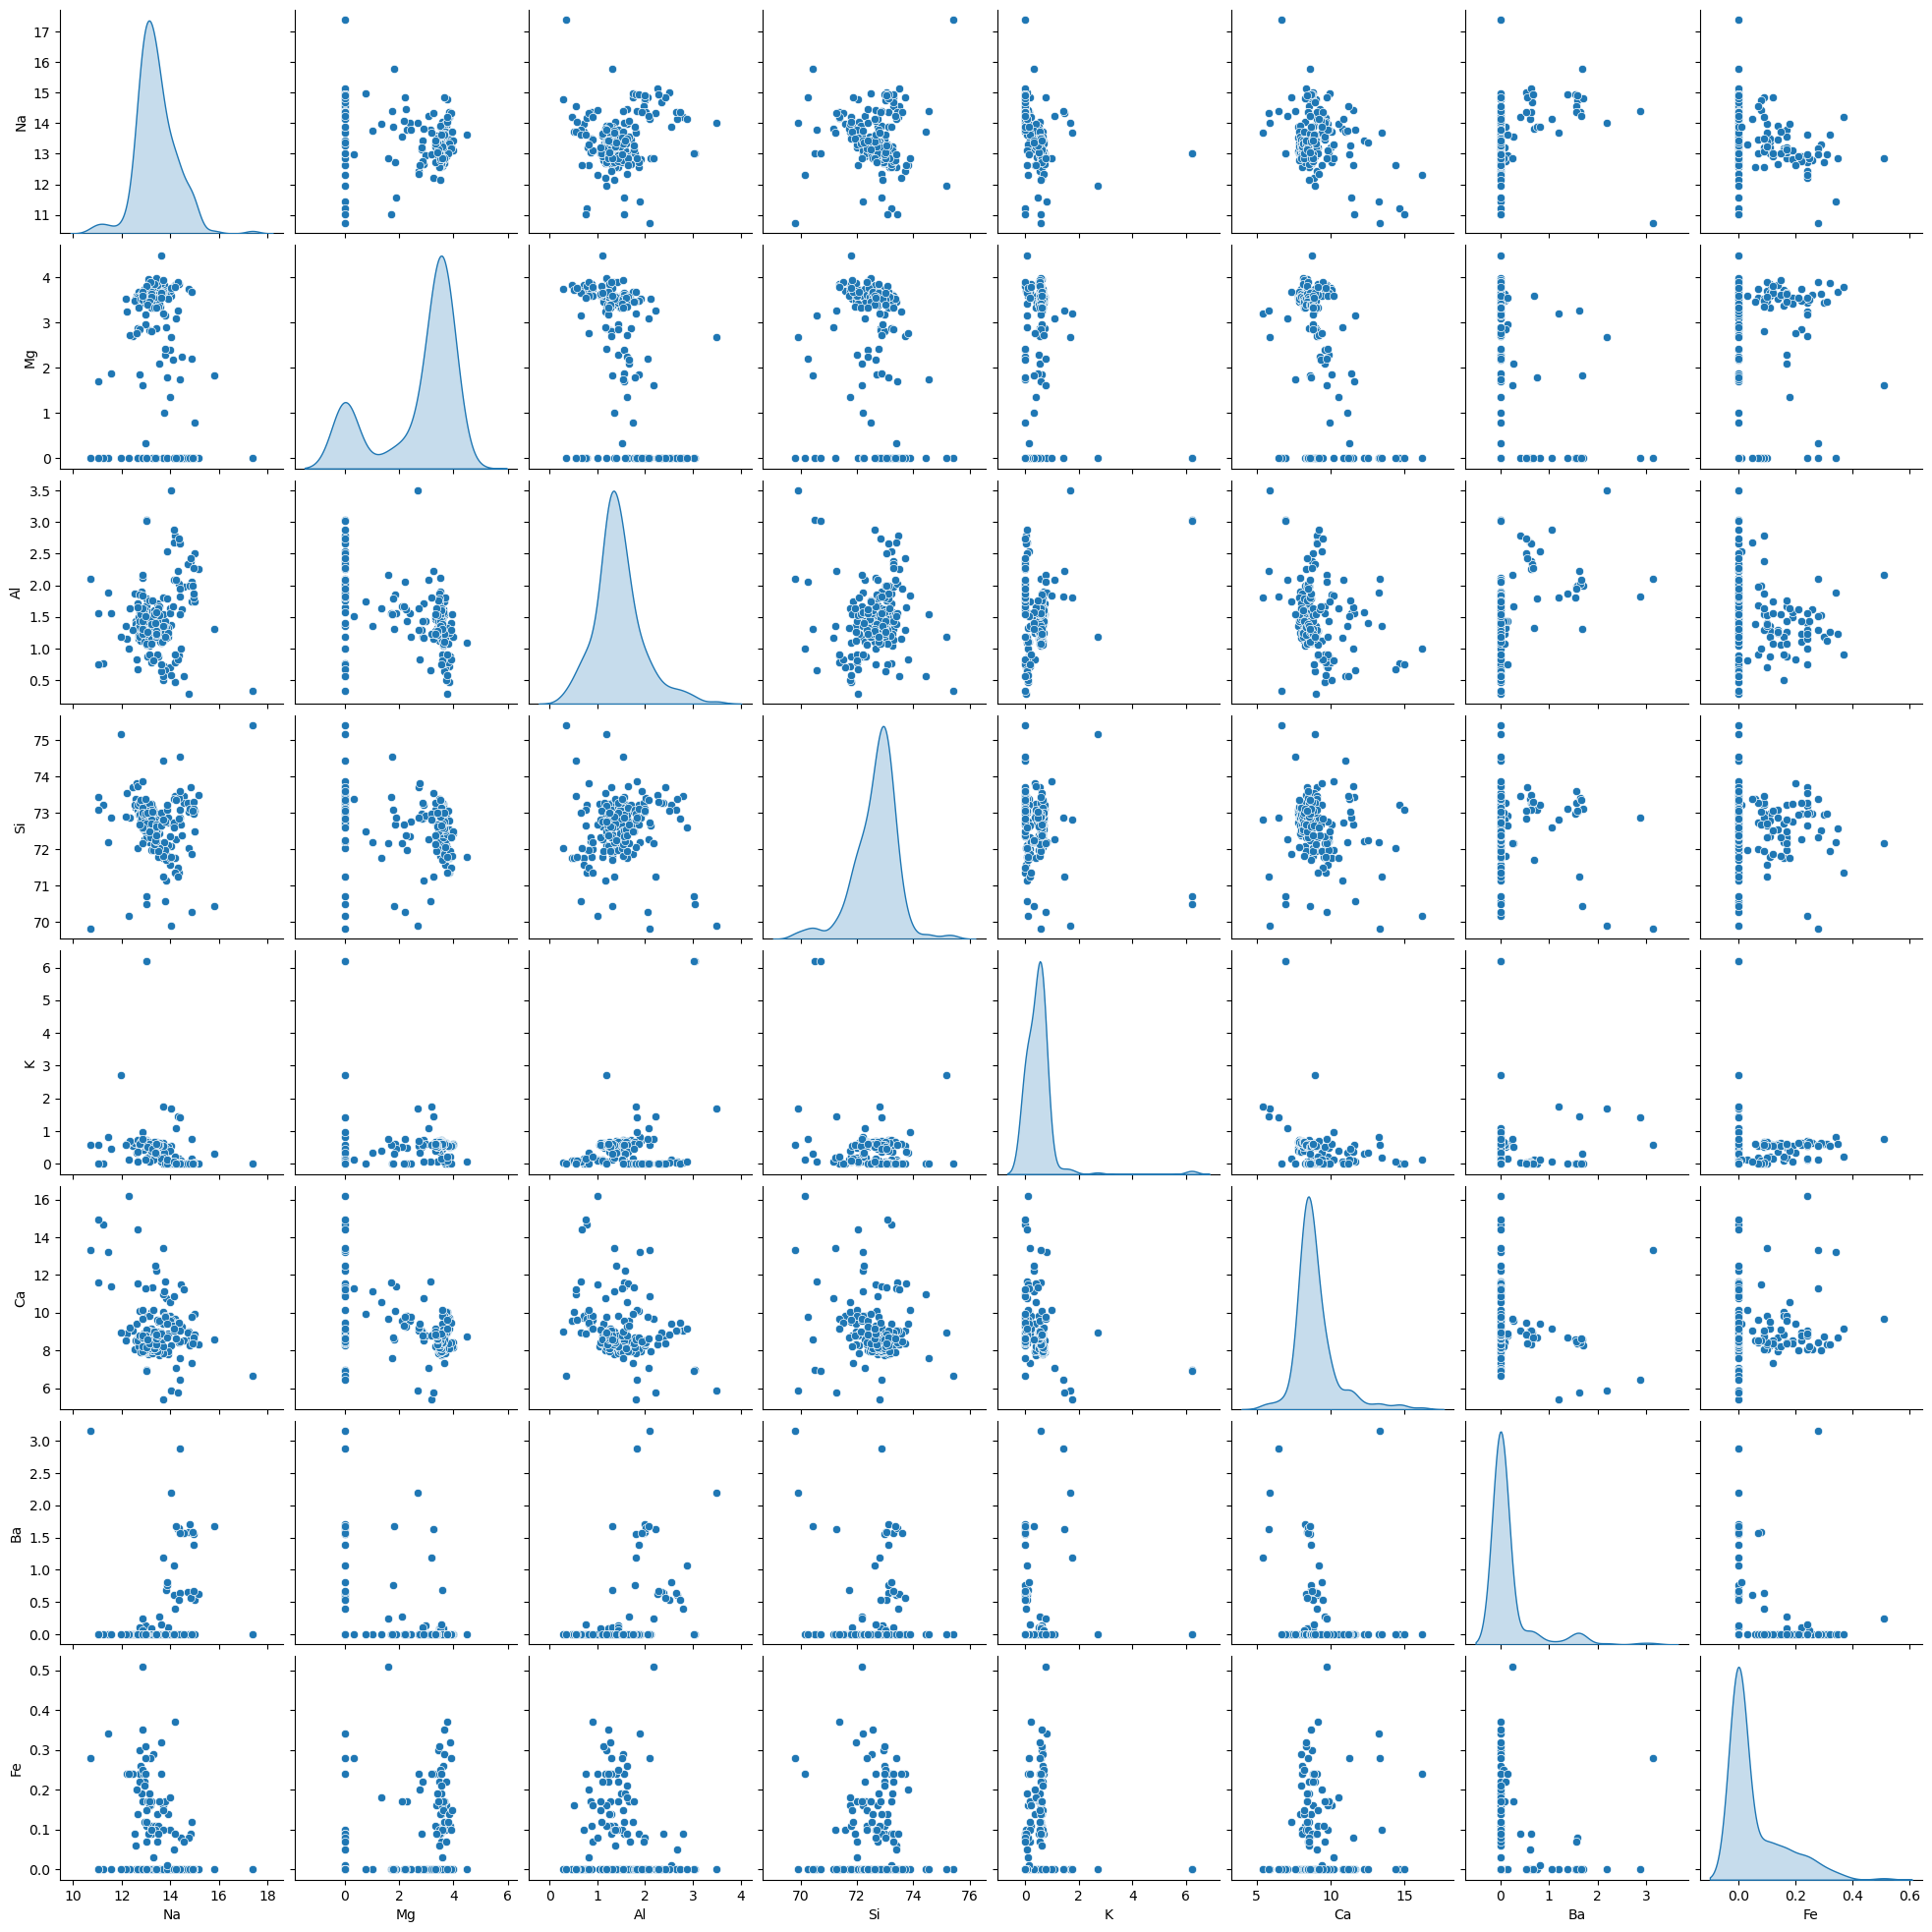

In [13]:
#creating a pair plot for hole dataset

sns.pairplot(df.iloc[:,1:9],diag_kind='kde')

# 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [14]:
#finding the values of oulayers

q1=df['RI'].quantile(0.25)
q3=df['RI'].quantile(0.75)

IQR=q3-q1

outlayers=df[(df['RI']< (q1-1.5*IQR)) | (df['RI']> (q3+ 1.5*IQR))]

print("outlayers \n",outlayers)



outlayers 
           RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10     1
50   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16     1
56   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31     1
103  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
104  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00     2
105  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00     2
131  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10     2
170  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00     5
184  1.5

In [15]:
#checking for oulayers values 

a=list(df.iloc[:,:9])
for i in a:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)

    IQR=q3-q1

    outlayers=df[(df[i]< (q1-1.5*IQR)) | (df[i]> (q3+ 1.5*IQR))]

    print(f"outlayers {i}\n",outlayers)
    print()

outlayers RI
           RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10     1
50   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16     1
56   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31     1
103  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
104  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00     2
105  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00     2
131  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10     2
170  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00     5
184  1

In [16]:
#here we can find many outlayers but the random forest is generally robust to outlayers and does not require manual outlayer
#removal in most of the cases .so we are not removing them manually


In [17]:
#2 checking for the categorical datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [18]:
#from above information we can see there are no categorical values so we cant perform the one hot encoding or label encoding.

In [19]:
#feature scaling

x=df.iloc[:,:9]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
#3 applying the feature scaling technique

from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

x_cont=scale.fit_transform(x)
x_cont=pd.DataFrame(x_cont,columns=list(df.iloc[:,:9]))
x_cont

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [21]:
#spliting the data into x and y 

x=x_cont         #independent feature scaled values
y=df.iloc[:,9:] #y dependent variable


# 4: Random Forest Model Implementation
1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [22]:
#divind the data into train test split

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=37)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((171, 9), (43, 9), (171, 1), (43, 1))

In [23]:
#implementing the random forest classifier 

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,max_samples=0.7,max_features=0.7,max_depth=7)

model.fit(xtrain,ytrain)

y_pred_train=model.predict(xtrain)
y_pred_test=model.predict(xtest)



C:\Users\moham\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [24]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score,log_loss

accuracy=accuracy_score(ytrain,y_pred_train)
accuracytest=accuracy_score(ytest,y_pred_test)

print("accuracy score of train",accuracy)
print("accuracy score of test",accuracytest)
print()

#losstrain=log_loss(ytrain,y_pred_train)
#losstest=log_loss(ytest,y_pred_test)

#print("log loss of train",losstrain)
#print("log loss of test",losstest)
print()

precisiontrain=precision_score(ytrain,y_pred_train,average="macro")
precisiontest=precision_score(ytest,y_pred_test,average='macro')

print("precision score of train",precisiontrain)
print("precision score of test",precisiontest)
print()


recalltrain=recall_score(ytrain,y_pred_train,average="macro")
recalltest=recall_score(ytest,y_pred_test,average='macro')

print("recall score of train",recalltrain)
print("recall score of test",recalltest)
print()


f1train=f1_score(ytrain,y_pred_train,average="macro")
f1test=f1_score(ytest,y_pred_test,average='macro')

print("f1 score of train",f1train)
print("f1 score of test",f1test)
print()


accuracy score of train 0.9766081871345029
accuracy score of test 0.7209302325581395


precision score of train 0.9897435897435898
precision score of test 0.8039215686274509

recall score of train 0.9616702741702742
recall score of test 0.7743386243386242

f1 score of train 0.9741800090637299
f1 score of test 0.7199722799722799



In [25]:
print("training classification report \n",classification_report(ytrain,y_pred_train))
print("testing classification report \n",classification_report(ytest,y_pred_test))


training classification report 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        61
           2       1.00      0.98      0.99        56
           3       1.00      0.83      0.91        12
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         8
           7       1.00      0.95      0.98        22

    accuracy                           0.98       171
   macro avg       0.99      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171

testing classification report 
               precision    recall  f1-score   support

           1       0.50      0.89      0.64         9
           2       0.82      0.70      0.76        20
           3       1.00      0.20      0.33         5
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      0.86      0.92         7

    accuracy

In [26]:
#cross validation 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

model=RandomForestClassifier(n_estimators=100,max_samples=0.7,max_features=0.7,max_depth=7)

scoretrain=cross_val_score(model,xtrain,ytrain,cv=8,scoring='accuracy')

scoretest=cross_val_score(model,xtrain,ytrain,cv=8,scoring='accuracy')

print("Cross validation score of training",scoretrain.max())
print("Cross validation score of testing",scoretest.max())

Cross validation score of training 0.9047619047619048
Cross validation score of testing 0.9047619047619048


# 5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


In [27]:
#we are having two bagging techniques like bagging classifier(bootstraping) and randomforest are both bagging methods
#for bagging methos we have "gradient boosting","adaptive boosting" and "xtreme gradient booosting" and "light gradient boosting"
#for these problem we have applied a bagging thechnique that is randomforest
#the other technique is bootstraping


In [28]:
#bootstraping method/bagging classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bagging=BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),n_estimators=50,max_samples=0.70,max_features=0.7,random_state=37)

bagging.fit(xtrain,ytrain)

y_pred_train=bagging.predict(xtrain)
y_pred_test=bagging.predict(xtest)

accuracytrain=accuracy_score(ytrain,y_pred_train)
accuracytest=accuracy_score(ytest,y_pred_test)

print("accuracy score train with bagging",accuracytrain)

print("accuracy score test with bagging",accuracytest)

accuracy score train with bagging 0.9941520467836257
accuracy score test with bagging 0.6976744186046512


In [29]:
#implementing the random forest classifier 

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,max_samples=0.7,max_features=0.7,max_depth=7,random_state=37)

model.fit(xtrain,ytrain)

y_pred_train=model.predict(xtrain)
y_pred_test=model.predict(xtest)

accuracytrain=accuracy_score(ytrain,y_pred_train)
accuracytest=accuracy_score(ytest,y_pred_test)

print("accuracy score train with random forest",accuracytrain)

print("accuracy score test with random forest",accuracytest)

accuracy score train with random forest 0.9707602339181286
accuracy score test with random forest 0.7209302325581395


# boosting algorithms

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

boosting=GradientBoostingClassifier(n_estimators=100,learning_rate=2,random_state=37,max_depth=7)

boosting.fit(xtrain,ytrain)

y_pred_train=boosting.predict(xtrain)
y_pred_test=boosting.predict(xtest)

accuracy1=accuracy_score(ytrain,y_pred_train)
accuracytest1=accuracy_score(ytest,y_pred_test)

print("accuracy score train with Gradient boosting",accuracy1)

print("accuracy score test with Gradient boosting",accuracytest1)

accuracy score train with Gradient boosting 1.0
accuracy score test with Gradient boosting 0.6046511627906976


In [31]:
#it will adabtive the wrongly classified data and try to make it correct for other iterartion



from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=3)
ab_model.fit(xtrain,ytrain)

y_pred_train_ab = ab_model.predict(xtrain)
y_pred_test_ab = ab_model.predict(xtest)

training_accuracy_ab = accuracy_score(ytrain, y_pred_train_ab)
test_accuracy_ab = accuracy_score(ytest, y_pred_test_ab)

print("AdaBoost - Training Accuracy:", training_accuracy_ab)
print("AdaBoost - Test Accuracy:", test_accuracy_ab)


AdaBoost - Training Accuracy: 0.6549707602339181
AdaBoost - Test Accuracy: 0.5116279069767442


In [32]:
#from the above results we can notice that bagging classsifier/bagging method are approximately giving the same result but the 
#boosting methods are giving the different results and for the gradient bossting method there is a overfitting issue

# Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.

2. Explain how to handle imbalance in the data.

In [33]:
#1.Explain Bagging and Boosting methods. How is it different from each other. 

#Ans:-Bagging and boosting are the two ensemble methods used to improve the performance of machine learning by combining 
#      multiple weaker models into a stronger ones.

#Bagging

#==>bagging trains multiple models (of same types)on different random subset of dataset
#==>each model is "trained independently" in parallel
#==>the prediction from all models are average(regression)and majority voted(for classification)
#-->focuses on Reducing variance(overfitting)

#    ex:Random forest,Bootstrping/bagging classifier

#Boosting
#==========#

#-->Boosting builds model are "sequentially" where each model attempts to correct the "errors of previous model" 
#-->it assign "higher weightage to misclassified samples" making the model focus on these difficult cases.
#-->the final prediction is sum of all models
#-->focuses of  reducing bias(underfitting)

# ex:adaboost(adaptive boosting),Gradient Boosting,extreme gradient boosting


In [34]:
#2.Explain how to handle imbalance in the data.

#Ans:-Boosting usually results in higher accuracy but can be prone to overfitting, while Bagging reduces variance and is more stable.

#Handling Imbalanced Data

#Imbalanced data occurs when one class is significantly more frequent than others, leading to biased predictions.

#Methods to Handle It

#--> Resampling Techniques

#--> Oversampling: Duplicate minority class samples (e.g., SMOTE - Synthetic Minority Over-Sampling Technique).
#--> Undersampling: Reduce majority class samples to balance the dataset.
#--> Class Weight Adjustment
#--> Assign higher weights to the minority class in algorithms such as Logistic Regression, Random Forest, XGBoost to prevent bias toward the majority class.
#--> Anomaly Detection Methods
#--> Treat the minority class as an anomaly using One-Class SVM or Isolation Forest.
